0 = FAKE    |    1 = REAL

In [121]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import re
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, roc_auc_score, roc_curve, precision_score, f1_score, recall_score,confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk


In [122]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
data = pd.read_csv('fake_news.csv')
data = data.drop(['id', 'author', 'text'], axis=1)

In [141]:
data.isnull().sum()

title    558
label      0
dtype: int64

In [142]:
data = data.fillna(' ')
data.isnull().sum()

title    0
label    0
dtype: int64

In [126]:
# data['content'] = data['title'] + " " + data['text']
# data = data.drop(['title', 'text'], axis=1)
# data = data[['content', 'label']]

In [143]:
X = data['title']
Y = data['label']

In [128]:
stem_obj = PorterStemmer()
def stemming(content):
    stemming_content = re.sub("^a-zA-Z", ' ', content)
    stemming_content = stemming_content.lower()
    stemming_content = stemming_content.split()
    stemming_content = [stem_obj.stem(word) for word in stemming_content if not word in stopwords.words('english')]
    stemming_content = ' '.join(stemming_content)
    return stemming_content

In [144]:
data['title'] = data['title'].apply(stemming)

In [145]:
X = data['title'].values
Y = data['label'].values

In [146]:
vectorized = TfidfVectorizer()
vectorized.fit(X)
X = vectorized.transform(X)

In [147]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=2)

In [148]:
# print(X.shape, Y.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [149]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [150]:
y_pred = model.predict(x_test)

In [151]:
Accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# # Calculate recall
recall = recall_score(y_test, y_pred)

# # Calculate F1-score
f1_scores = f1_score(y_test, y_pred)

print("Accuracy : ", Accuracy)
print("precision : ", precision)
print("Recall : ", recall)
print("f1_score : ", f1_scores)

Accuracy :  0.9257211538461538
precision :  0.8842905405405406
Recall :  0.9835603569751057
f1_score :  0.9312875250166778


In [152]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

print(conf_matrix_df)

                 Predicted Negative  Predicted Positive
Actual Negative                1757                 274
Actual Positive                  35                2094


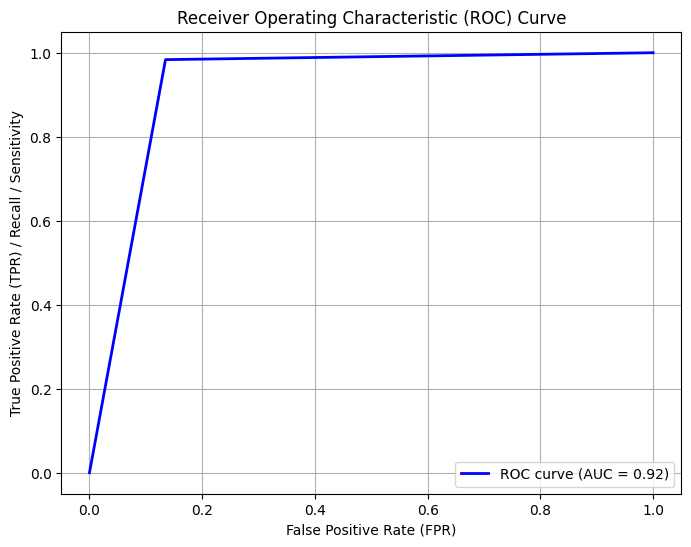

In [153]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall / Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

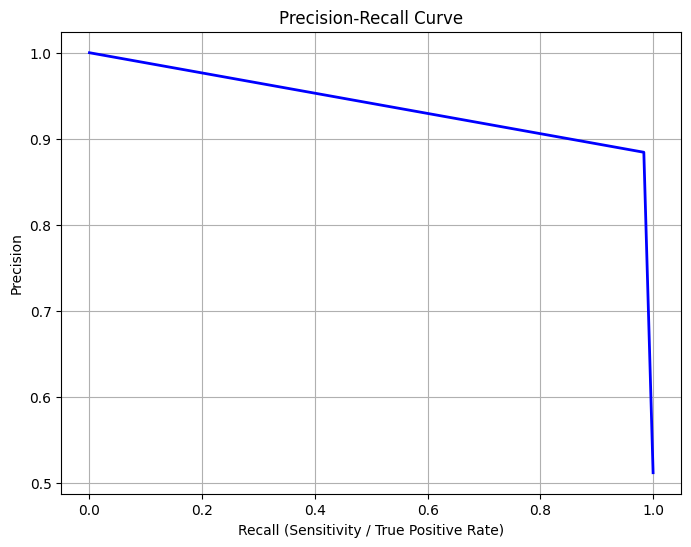

In [154]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall (Sensitivity / True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()